# Red Wine Classification Report
### By DSCI 100, Group 39

## Introduction

The Wine Quality Dataset contains information about White Wine and Red Wine variants of Vinho Verde, Portugal. Portugal is a top ten wine exporting country which holds 3% of the market share (FAOSTAT, 2019). The Portuguese wine market is dominated by still wines, specifically red wine. (Romo-Muñoz, Monje-Sanhueza, Garrido-Henríquez, & Gil, 2020) Therefore, for our project we will be looking at the quality of red wine and the factors that create balance. 

A higher-quality wine has all of its components balanced, whereas a lower-quality wine has an element that stand out more than the rest. The question we are trying to answer is ****“Can we use the physicochemical properties of red wine to objectively predict whether the quality of a future unknown wine will be poor, satisfactory, or excellent?”****  We will be using a dataset collected from 1599 samples of the red variant of Vinho Verde. The dataset contains 12 elements: fixed quality, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates, alcohol, and quality. Our output variable is “quality” which the classification model would try to accurately predict. The quality score is measured on a scale from 1 (bad) to 10 (good). 

As seen, there is no data regarding the wine brand, grape types, fertilizers/insectides used or retail price due to policy and logistical issues. The original number of observations in each class are imbalanced with much more satisfactory wines than good or bad ones which is fairly understandable. The original research used a regression model to preserve the order of the wine scores and derive distinct accuracy results. 

Our goal is to create an efficient model capable of generating accurate predictions for red wine grown in Vinho Verde which could then be used to improve production efficiency and certification criterias. (Rodrigues et al., 2011)

## Preliminary Exploratory Data Analysis

In [101]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

### 1. Read the red_wine dataset in JupyterLabs

In [102]:
red_wine <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,6


### 2. Transform quality from integers into categorical variables
Originally, quality refered to a range of values from 01-10. We used ****mutate()**** to give each integer a character classification.

The red_wine dataset doesn't contain any wines that are ranked 1, 2, 9, & 10. Thus, we created categorical names for integers 3 - 8. 


****A red wine ranked as 3 - 4 is a poor rating; 5 - 6 is a satisfactory rating; and 7 - 8 is an excellent rating.****

In [103]:
red_wine <- red_wine %>%
    mutate(quality = case_when(quality == "8" ~ "Excellent",
                              quality == "7" ~ "Excellent",
                              quality == "6" ~ "Satisfactory",
                              quality == "5" ~ "Satisfactory",
                              quality == "4" ~ "Poor",
                              quality == "3" ~ "Poor"))
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,Satisfactory
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,Satisfactory


### 3. Convert quality as a factor & the other variables as numeric

In [104]:
red_wine <- red_wine %>% 
    mutate(fixed.acidity = as.numeric(fixed.acidity)) %>% 
    mutate(volatile.acidity = as.numeric(volatile.acidity)) %>% 
    mutate(citric.acid = as.numeric(citric.acid)) %>% 
    mutate(residual.sugar = as.numeric(residual.sugar)) %>% 
    mutate(chlorides = as.numeric(chlorides)) %>% 
    mutate(free.sulfur.dioxide = as.numeric(free.sulfur.dioxide)) %>% 
    mutate(total.sulfur.dioxide = as.numeric(total.sulfur.dioxide)) %>% 
    mutate(density = as.numeric(density)) %>% 
    mutate(pH = as.numeric(pH)) %>% 
    mutate(sulphates = as.numeric(sulphates)) %>% 
    mutate(alcohol = as.numeric(alcohol)) %>% 
    mutate(quality = as.factor(quality))
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


### 4. Create a table with the counts for each quality classification

In [105]:
quality_count <- red_wine %>%
    group_by(quality) %>% 
    summarize(quality_counts = mode(quality))
quality_count

`summarise()` ungrouping output (override with `.groups` argument)



quality,quality_counts
<fct>,<chr>
Excellent,numeric
Poor,numeric
Satisfactory,numeric


### 5. Compare the amount of observations within each quality classification

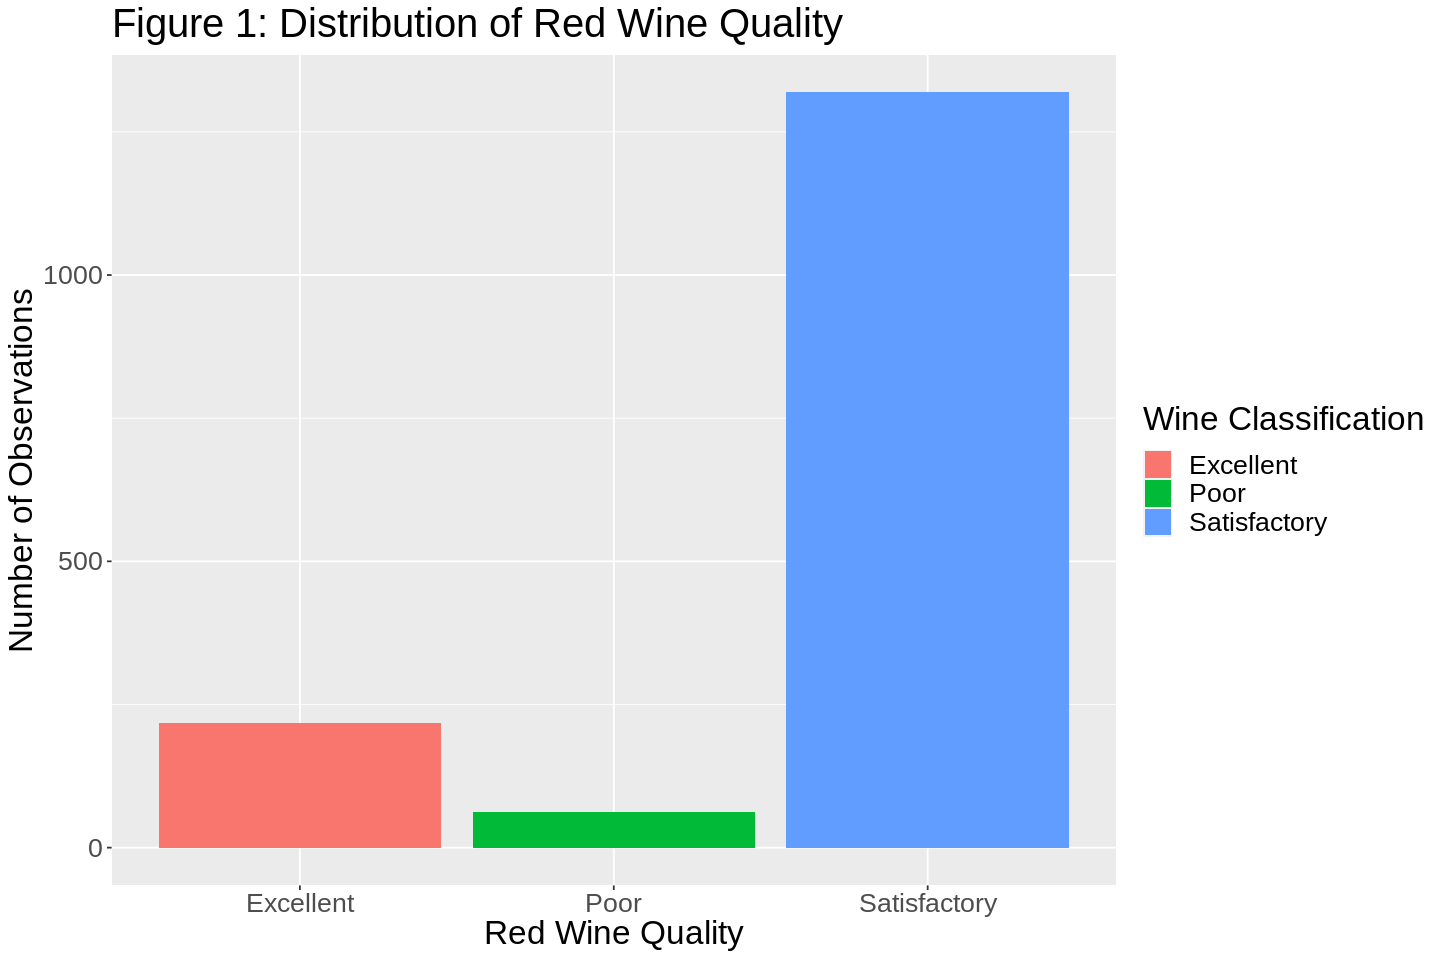

In [106]:
options(repr.plot.width = 12, repr.plot.height = 8)
quality_distribution <- red_wine %>% 
    ggplot(aes(x = quality, fill = quality)) +
    geom_bar() +
    labs(x = "Red Wine Quality", y = "Number of Observations", fill = "Wine Classification") +
    ggtitle("Figure 1: Distribution of Red Wine Quality") +
    theme(text = element_text(size = 20))
quality_distribution

## K-nearest Neighbors Classification

In [107]:
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


In [108]:
na_number<-sum(is.na(red_wine))
na_number

[1] 0

### 1. Separate red_wine into a training and testing set

In [109]:
set.seed(1234)

red_wine_split <- initial_split(red_wine, prop = 0.75, strata = quality)
red_wine_training <- training(red_wine_split)
red_wine_testing <- testing(red_wine_split)

### 2. Create a recipe using all predictors

In [110]:
set.seed(1234)

recipe <- recipe(quality ~ . , data = red_wine_training)%>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())
recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         11

Operations:

Centering for all_predictors()
Scaling for all_predictors()

### 3. Perform 10-fold cross-validation on red_wine_training

In [111]:
set.seed(1234)

vfold <- vfold_cv(red_wine_training, v = 10, strata = quality)

### 4. Tune to get the highest K

In [112]:
set.seed(1234)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### 5. Create a workflow analysis

In [113]:
set.seed(1234)

knn_results <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = vfold, grid = 20) %>%
    collect_metrics()
knn_results 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8216667,10,0.01298147,Model01
1,roc_auc,hand_till,0.6471023,10,0.01677644,Model01
2,accuracy,multiclass,0.8216667,10,0.01298147,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,roc_auc,hand_till,0.7559419,10,0.019442882,Model14
15,accuracy,multiclass,0.8241667,10,0.007997878,Model15
15,roc_auc,hand_till,0.7531833,10,0.019748802,Model15


### 6. Collect the results and plot the accuracy against K

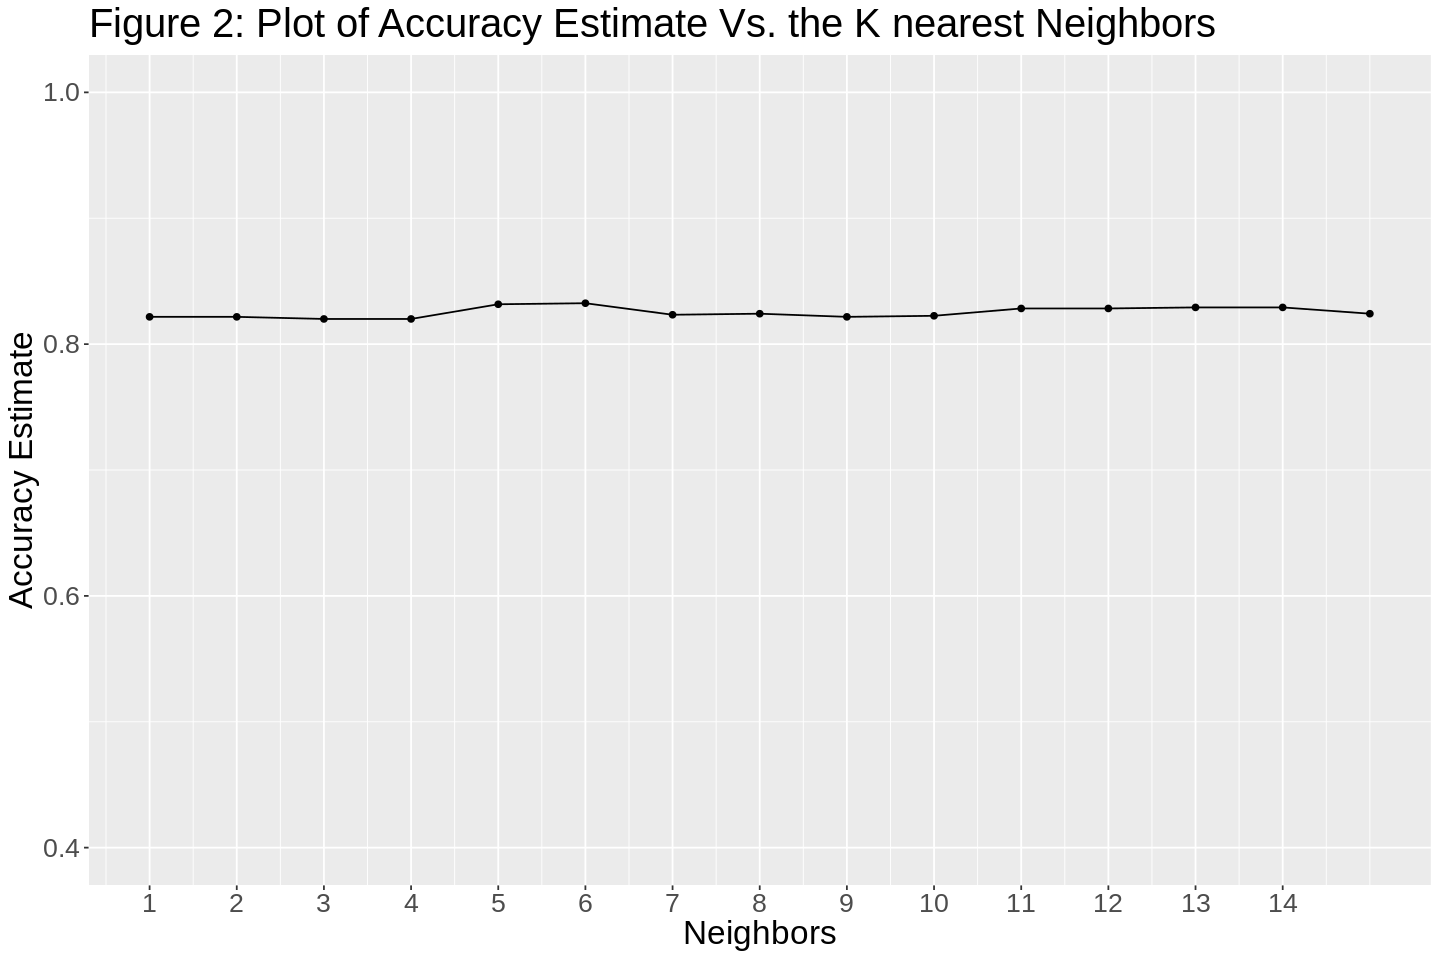

In [118]:
set.seed(1234)

accuracies <- knn_results %>% 
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 2: Plot of Accuracy Estimate Vs. the K nearest Neighbors") +
    scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
    scale_y_continuous(limits = c(0.4, 1.0)) +  
    theme(text = element_text(size = 20)) 
cross_val_plot

### 7. Select the best K that has a high accuracy estimate 

In [115]:
set.seed(1234)

best_accuracy <-  accuracies %>% filter(mean == max(mean)) %>% slice(1)
best_accuracy

best_k <- best_accuracy %>% pull(neighbors)
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,multiclass,0.8325,10,0.008735658,Model06


[1] 6

### 8. Build the final classification model with the best K

In [116]:
set.seed(1234)

mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
    set_engine("kknn") %>%
    set_mode("classification")
mnist_spec

mnist_fit <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(mnist_spec) %>%
    fit(data = red_wine_training)
mnist_fit 

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = best_k
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_center()
● step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1766667
Best kernel: rectangular
Best k: 6

### 9. Predict on red_wine_testing & report the prediction accuracy and confusion matrix

In [117]:
set.seed(1234)

mnist_predictions <- predict(mnist_fit, red_wine_testing) %>%
    bind_cols(red_wine_testing) 
mnist_predictions

mnist_metrics <- mnist_predictions %>%
    metrics(truth = quality, estimate = .pred_class) 
mnist_metrics

mnist_conf_mat <- mnist_predictions %>%
    conf_mat(truth = quality, estimate = .pred_class) 
mnist_conf_mat

.pred_class,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Satisfactory,7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,Satisfactory
Satisfactory,5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,Satisfactory
Satisfactory,8.9,0.620,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Satisfactory,6.8,0.67,0.15,1.8,0.118,13,20,0.99540,3.42,0.67,11.3,Satisfactory
Excellent,6.7,0.32,0.44,2.4,0.061,24,34,0.99484,3.29,0.80,11.6,Excellent
Satisfactory,6.0,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8345865
kap,multiclass,0.3700904


              Truth
Prediction     Excellent Poor Satisfactory
  Excellent           24    2           21
  Poor                 0    2            2
  Satisfactory        29   12          307

## Methods and Results

We will conduct our data analysis using all variables because they all matter for red wine quality, and we want to know how to balance the variables for excellent quality. We will have quality as the prediction result. All factors, except quality, are collected using physicochemical tests. We will be creating a model that allows us to classify the wine's quality in three categories, given its other eleven properties. The three types are: 

- Excellent: score of 7 and 8
- Satisfactory: score of 5 and 6
- Poor: score of 3 and 4

To conduct the analysis, we will first split our data into training  and testing data to avoid violating the golden rule. Next, we split the training data into validation sets for 10-fold cross-validation. By looking at multiple validation sets, we can find their average for our cross-validation accuracy. We tuned the K-nearest neighbors of our classification model to maximize our cross-validation accuracy estimates. We predicted the result of our model on the testing data and compared it to our true quality to see our model's accuracy. The data is visualized using a line graph that shows estimate accuracy vs. the K nearest neighbors to see how K affects our prediction accuracy.

## Discussion

Using the cross-validation method, we found that the k-value of 13 computed a classifier with the highest accuracy, although accuracies of k-values were not significantly differnt than k = 1 as shown in the graph. We also found that our classifier was 84.7% accurate on the test data compared to 83.3% on the training data. It predicted 0 bad quality wines, 22 good quality wines and 316 statisfactory quality wines accurately, compared to predicting 16 bad quality wines, 31 good quality wines and 14 satisfactory quality wines inaccurately.

We expected our model to have a bit higher accuracy than 84.7% as we used 11 chemcial properties as predictors in our classifer and scaled and centered them so that each variable had an equal effect on the classifier by making each predictor's mean equal to 0 and standard deviation equal to 1. We also tuned our classifier by performing cross-validation to choose a k-value that would help us maximize accuracy along with other measures taken. 

Our model helped classify quality of red wine depending on 11 factors: fixed quality, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates and alcohol. a wine label can use the model we have created to see which qualities and their quantities lead to a wine of a good quality and use that information to change their wine production. The wine labels can modify their product by changing its chemical properties accordingly to increase their sales as well as receive positive feedback from wine critics and customers which could help the label establish itself as a reputable brand. This model also brings a more analytical testing for wine in order to pass the certification phase by Portuguese law rather than relying on human wine testers.

Some of the questions we can ask is if this model is accomodating towards different wine labels since we don't know the wine labels of the samples and we don't know if this sample was a good representative of all red wine from different brands. We can also  We can also ask if there are any other factors that can help us increase the accuracy of our tester such that eventually, there will be no need of human testers as we can rely complete on this analytical test for the quality of the wine dependent on its chemical properties as sometimes wine critics can be biased and simply rank a wine on the higher quality spectrum simply because of its label. We can also ask ourselves whether we can use similar models to assess other foods and drinks as well. 


## References

Food and Agriculture Organization of the United Nations (FAOSTAT). (2019, October 9). Food and Agriculture Organization Agriculture Trade Domain Statistics. Retrieved from http://faostat.fao.org/site/535/DesktopDefault.aspx?PageID=535

Rodrigo Alejandro Romo-Muñoz, Rodrigo Monje-Sanhueza, Héctor Garrido-Henríquez, José M Gil. (2020) Key market values for bottled wine in an emerging market: product attributes or business strategy?. Applied Economics 52:34, pages 3669-3679.

Rodrigues, S., Otero, M., Alves, A., Coimbra, J., Coimbra, M., Pereira, E., & Duarte, A. (2011, January 18). Elemental analysis for categorization of wines and authentication of their certified brand of origin. Retrieved April 09, 2021, from https://www.sciencedirect.com/science/article/pii/S0889157511000184?casa_token=QhrKN4X-rToAAAAA%3Ann9L8HocNfoGCjcMHTcvbScsF4ZZ2VsT-xTyDHfv5fa--TZ7UMjhgxsANsfKHAwSApCvuTLe0g